# Get segmentation

About MXNet:
https://gluon-cv.mxnet.io/build/examples_segmentation/demo_psp.html#sphx-glr-build-examples-segmentation-demo-psp-py    

In [1]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
from gluoncv.data.transforms.presets.segmentation import test_transform
from matplotlib import pyplot as plt
import glob
import gluoncv
from skimage import io
import mxnet as mx
from mxnet import image
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
import glob
import os

import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
from gluoncv.data.transforms.presets.segmentation import test_transform
from matplotlib import pyplot as plt
import gluoncv
import numpy
from PIL import Image


model = gluoncv.model_zoo.get_model('psp_resnet101_ade', pretrained=True, ctx=mx.gpu(0))
ctx = mx.gpu(0)
import numpy
from PIL import Image

import sklearn as sk
import pandas as pd
import numpy as np
import os
import re
import glob
import requests
from dbfread import DBF
from pyproj import CRS
from pyproj import Transformer
from pandas import DataFrame
import pandas as pd
from simpledbf import Dbf5

self.crop_size 480


In [35]:
from natsort import natsorted  # Huan

image_dir = r'..\test_images'
file_ext = "*.jpg"

saved_path = r'..\test_images_segmentations'
if not os.path.exists(saved_path):
    os.mkdir(saved_path)

test_files = glob.glob(os.path.join(image_dir, file_ext))

test_files = natsorted(test_files)

print("len of test_files:", len(test_files))


import random
print("before sampling:", len(test_files))
sample_number = len(test_files)
test_files = random.sample(test_files, sample_number)
print("after sampling:", len(test_files))

for idx, filename in enumerate(test_files):
    try:
        img = image.imread(filename)
        if img.shape[0] > 1023:
            img = image.resize_short(img, 1024) 
#         img = image.resize_short(img, 100)
        
#         print("filename: ", filename)
#         ctx = mx.gpu(0)

        img = test_transform(img, ctx)
  
        output = model.predict(img)
        
 
        
        predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

 
        mask = get_color_pallete(predict, 'ade20k')

        #predict.save('predict.png')
        #mmask = mpimg.imread('output.png')
        predict = predict.astype(numpy.uint8)
        new_basename = os.path.basename(filename).replace(".jpg", ".png")
        new_name = os.path.join(saved_path, new_basename)
        io.imsave(new_name, predict)
        new_basename = os.path.basename(filename).replace(".jpg", "_color.png")
        new_name = os.path.join(saved_path, new_basename)
        mask.save(new_name)
        if idx % 1 == 0:
            print("Processed: ", idx)
    except Exception as e:
        print("Error in PSPNet:",filename, e)
        continue

len of test_files: 5
before sampling: 5
after sampling: 5
Processed:  0
Processed:  1
Processed:  2
Processed:  3
Processed:  4


#  ADE20K class list:
https://github.com/CSAILVision/sceneparsing/blob/master/objectInfo150.csv


# Remove occluded 

## Read PNGs

In [36]:
import glob
import PIL
import numpy as np
from PIL import Image
from natsort import natsorted
import matplotlib.pyplot as plt

folder = os.path.join(saved_path, '*.png')
files = glob.glob(folder)

files_png = []

for f in files:
    if  "_color.png" in f:
        files_png.append(f)
        
files_png = natsorted(files_png)
files_png

['..\\test_images_segmentations\\60_zh7uCC1KLkIzHORYwIVlIQ_205.13_color.png',
 '..\\test_images_segmentations\\98_WHmViscF_6leDhpZLosXSQ_326.26_color.png',
 '..\\test_images_segmentations\\99_knxYmIUR3lddp9sbVp1x2w_218.7_color.png',
 '..\\test_images_segmentations\\100_oUUwCL6RJ53TmRjrP5u1SQ_32.55_color.png',
 '..\\test_images_segmentations\\101_ZfvvGESbNnVG8yFN9PORqQ_24.2_color.png']

##  ADE20k Code
2: building, edifice

3: sky

5：tree

10: grass

18: plant;flora;plant;life

26: house

73: palm;palm;tree

## remove

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

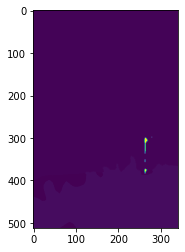

 20%|████████████████▊                                                                   | 1/5 [00:00<00:00,  4.83it/s]

old_name :  ..\test_images\60_zh7uCC1KLkIzHORYwIVlIQ_205.13.jpg
New name:  ..\image_move_to_here\60_zh7uCC1KLkIzHORYwIVlIQ_205.13.jpg
Moved file to:  ..\image_move_to_here\60_zh7uCC1KLkIzHORYwIVlIQ_205.13.jpg


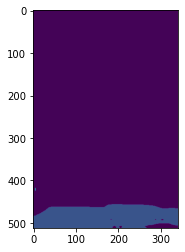

 40%|█████████████████████████████████▌                                                  | 2/5 [00:00<00:00,  4.95it/s]

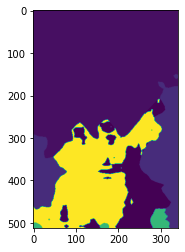

 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:00<00:00,  5.23it/s]

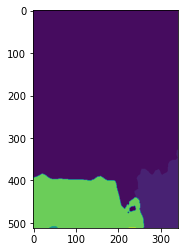

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:00<00:00,  5.41it/s]

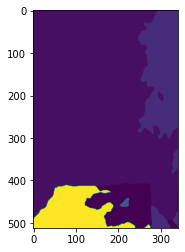

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.50it/s]


In [38]:
import shutil
import os
from tqdm import tqdm

 
move_to_dir = r'..\image_move_to_here'
if not os.path.exists(move_to_dir):
    os.mkdir(move_to_dir)

for png in tqdm(files_png[:]):
#     print(png)
    img = Image.open(png)
#     plt.imshow(img)
#     plt.show()
    
    img = np.array(img)
    
    h = 1024
    w = 1024
    
    clip_img = img[0:int(h/2), int(h/3):int(h*2/3)]  # just calculate the central part of the image
    
    hist = np.histogram(clip_img, range(153))
    
    plt.imshow(clip_img)
    plt.show()
    
#     print(img)
#     print(hist[0])
#     print(hist[0].sum())
#     print("wall:", hist[0][1])
#     print("building:", hist[0][2])
#     print("tree:", hist[0][5])
#     print("grass:", hist[0][10])
#     print("plant:", hist[0][18])
#     print("house:", hist[0][26])
#     print("palm;palm;tree:", hist[0][73])
    
    house_cnt =  hist[0][1] + hist[0][2] + hist[0][26]
    tree_cnt =  hist[0][5] + hist[0][18] + hist[0][73]
     
    house_pixel_enlarge_ratio = 1.5
    if tree_cnt > (house_cnt * house_pixel_enlarge_ratio):     
        basename = os.path.basename(png)
        basename = basename.replace('_color.png', '.jpg')
#         print("basename : ", basename)

        old_name = os.path.join(image_dir, basename)
        new_name = os.path.join(move_to_dir, basename)
        print("old_name : ", old_name)
        print("New name: ", new_name)
#         print("house_cnt, tree_cnt: ", house_cnt,  ', ',  tree_cnt)
        shutil.copy(old_name, new_name)
        print("copy file to: ", new_name)
        
#         plt.imshow(clip_img)
#         plt.show()
        